In [7]:
import pandas as pd
import scipy
import numpy as np
import scipy.sparse as sp
import scipy.io as spio

from scipy.stats import pearsonr

import operator
import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch, Rectangle
from matplotlib.font_manager import FontProperties
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.collections as collections

import isolearn.io as isoio

from analyze_aparent_designed_mpra_helpers import *


<h2>Load collapsed designed MPRA data</h2>

In [8]:
#Load designed MPRA data (Collapsed over experiment replicates)
seq_dict = isoio.load('../data/prepared_data/apa_array_data/apa_array_data_master_seq')
print("n = " + str(len(seq_dict['array_df'])))
print('Avg read count (avg over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['mean_total_count'])))
print('Pooled read count (pooled over barcodes) = ' + str(np.mean(seq_dict['array_df'].query("n_barcodes >= 2")['pooled_total_count'])))

#Load variant dataframe
variant_dict = isoio.load('../data/prepared_data/apa_variant_data/apa_variant_data_master_seq')
print("n (variants) = " + str(len(variant_dict['variant_df'])))

#Load predictions
model_name = 'aparent_theano_legacy_30_31_34_pasaligned'
pred_dict = isoio.load('predictions/apa_array_data_legacy/' + model_name + '_predictions_master_seq')

#Join mpra dataframes with prediction table and calculate cut probabilities
seq_df, variant_df = append_predictions(seq_dict['array_df'], seq_dict['pooled_cuts'], variant_dict['variant_df'], variant_dict['pooled_cuts_var'], variant_dict['pooled_cuts_ref'], pred_dict['array_df'], pred_dict['cut_prob'])


n = 39833
Avg read count (avg over barcodes) = 431.92676310713546
Pooled read count (pooled over barcodes) = 3656.5562880452626
n (variants) = 21734


In [12]:
#Filter data
seq_df_filtered = seq_df.query("mean_total_count >= 100 and n_barcodes >= 5")

df_all = seq_df_filtered.query("experiment == 'clinvar_wt' and variant == 'wt'")
max_iso_df_all = seq_df_filtered.query("experiment == 'max_iso' and variant != 'snv'")
max_iso_df_all = max_iso_df_all.loc[~max_iso_df_all.subexperiment.str.contains('cstf')]


pred_column = 'logodds_pred'
true_column = 'median_proximal_vs_distal_logodds'

<h2>Detailed SeqProp Target/Max Isoform analysis</h2>

In [13]:
max_iso_pwm_dict = load_max_isoform_pwms()

doubledope, Increasing isoform abundance objective...


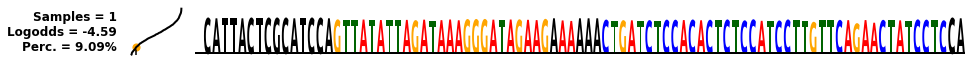

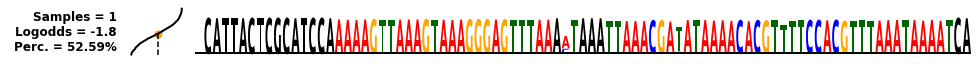

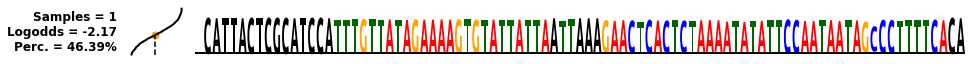

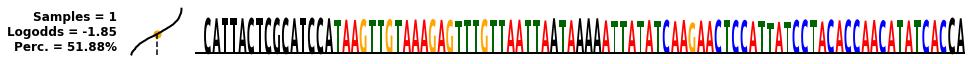

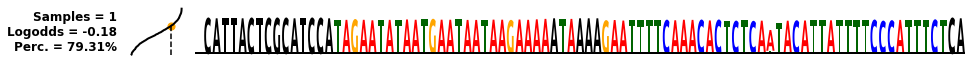

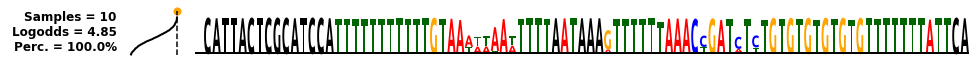

In [14]:

df_human = seq_df_filtered.query("experiment == 'clinvar_wt' and variant == 'wt'")

subexperiments = [
    ['target_00'],
    ['target_025'],
    ['target_05'],
    ['target_075'],
    ['target_10'],
    ['max_score_punish_cruns_harder']
]

gene = 'doubledope'#'tomm5'

max_index_list=['mid', 'mid', 'mid', 'mid', 'mid', 0]
true_column='median_proximal_vs_distal_logodds'
figsize=(14,1)#(14, 4)
width_ratios=[2, 1, 14]
logo_height = 0.75
usage_unit = 'log'#'fraction'

plot_mean_logo=False
plot_max_logo=True
plot_actual_pwm=False
plot_opt_pwm=True

black_fixed_seq=True

plot_start=9
plot_end=96 + 2 #+ 17
plot_percentile=True
override_mean_stats=False

save_figs=False

print(gene + ', Increasing isoform abundance objective...')

for i, subexperiment in enumerate(subexperiments) :
    max_index = max_index_list[i]
    
    plot_sequence_logo(max_iso_df_all.query("gene == '" + gene + "'"), df_human, max_iso_pwm_dict, gene, subexperiment, override_mean_stats=override_mean_stats, plot_percentile=plot_percentile, plot_mean_logo=plot_mean_logo, plot_max_logo=plot_max_logo, plot_actual_pwm=plot_actual_pwm, plot_opt_pwm=plot_opt_pwm, black_fixed_seq=black_fixed_seq, max_index=max_index, true_column=true_column, figsize=figsize, width_ratios=width_ratios, logo_height=logo_height, usage_unit=usage_unit, plot_snvs=False, seq_trim_start=0, seq_trim_end=164, plot_start=plot_start, plot_end=plot_end, pas_downscaling=1.0, save_figs=save_figs, fig_name='max_iso_' + gene + '_' + subexperiment[0], fig_dpi=150)

tomm5, Max isoform objective...


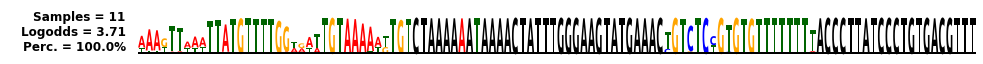

doubledope, Max isoform objective...


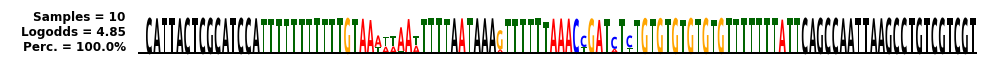

simple, Max isoform objective...


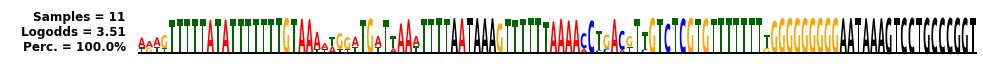

aar, Max isoform objective...


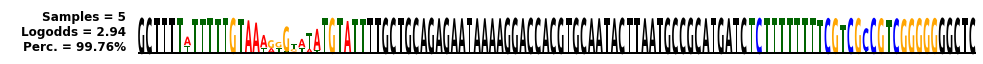

atr, Max isoform objective...


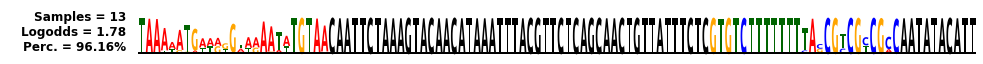

hsp, Max isoform objective...


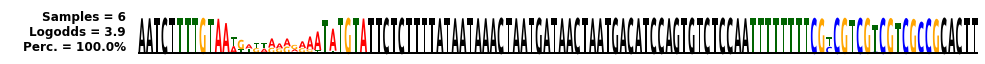

snh, Max isoform objective...


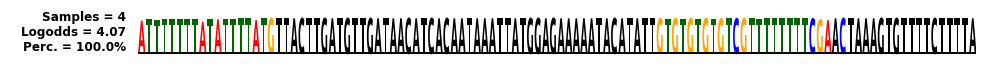

sox, Max isoform objective...


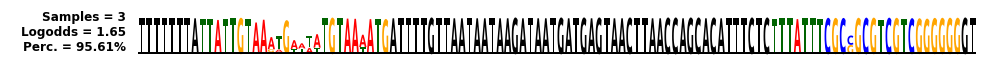

wha, Max isoform objective...


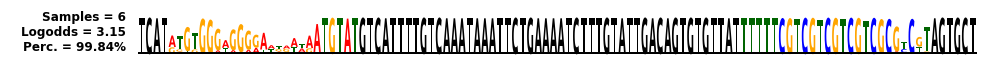

In [15]:

df_human = seq_df_filtered.query("experiment == 'clinvar_wt' and variant == 'wt'")

subexperiments = [
    'max_score_punish_cruns_harder'
]

genes = ['tomm5', 'doubledope', 'simple', 'aar', 'atr', 'hsp', 'snh', 'sox', 'wha']

max_index=0
true_column='median_proximal_vs_distal_logodds'
figsize=(14,1)#(14, 4)
width_ratios=[2, 1, 14]
logo_height = 0.75
usage_unit = 'log'#'fraction'

plot_mean_logo=False
plot_max_logo=True
plot_actual_pwm=False
plot_opt_pwm=True

black_fixed_seq=True

plot_start=9
plot_end=116 + 3#96 + 2
plot_percentile=False
override_mean_stats=False

save_figs=False

for i, gene in enumerate(genes) :
    print(gene + ', Max isoform objective...')
    
    plot_sequence_logo(max_iso_df_all.query("gene == '" + gene + "'"), df_human, max_iso_pwm_dict, gene, subexperiments, override_mean_stats=override_mean_stats, plot_percentile=plot_percentile, plot_mean_logo=plot_mean_logo, plot_max_logo=plot_max_logo, plot_actual_pwm=plot_actual_pwm, plot_opt_pwm=plot_opt_pwm, black_fixed_seq=black_fixed_seq, max_index=max_index, true_column=true_column, figsize=figsize, width_ratios=width_ratios, logo_height=logo_height, usage_unit=usage_unit, plot_snvs=False, seq_trim_start=0, seq_trim_end=164, plot_start=plot_start, plot_end=plot_end, pas_downscaling=1.0, save_figs=save_figs, fig_name='max_iso_' + gene + '_' + subexperiment[0], fig_dpi=300)

<h2>Saturation Mutagenesis of Max Isoform- optimized Sequences</h2>

------------------------------------------------------
gene = simple, sequence 0...
WT Usage = 0.9524 (2.9957)
# Significant upreg. SNVs = 14
# Significant downreg. SNVs = 104


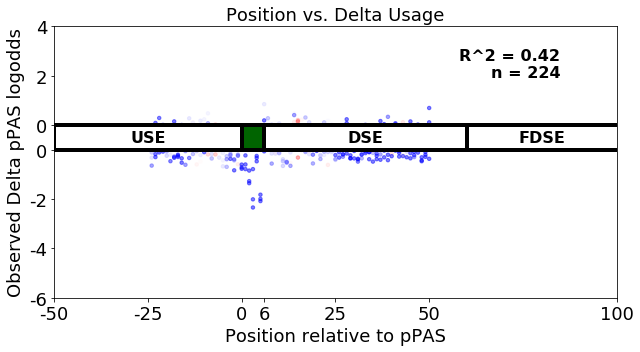

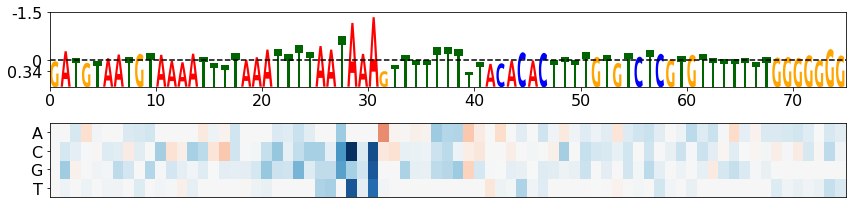

------------------------------------------------------
gene = doubledope, sequence 0...
WT Usage = 0.9933 (4.9936)
# Significant upreg. SNVs = 33
# Significant downreg. SNVs = 150


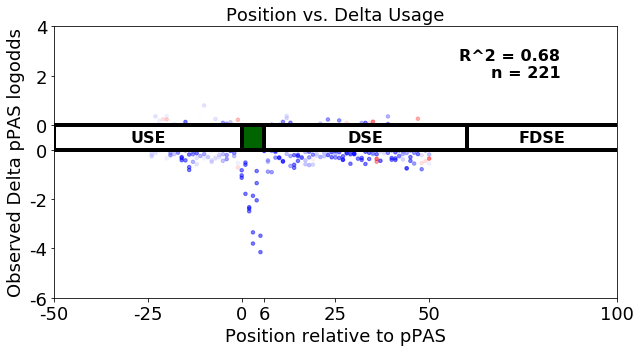

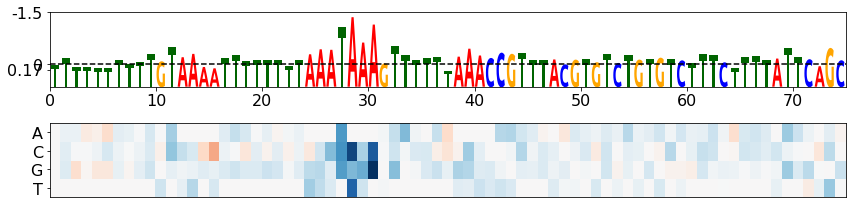

------------------------------------------------------
gene = doubledope, sequence 1...
WT Usage = 0.9899 (4.5824)
# Significant upreg. SNVs = 32
# Significant downreg. SNVs = 146


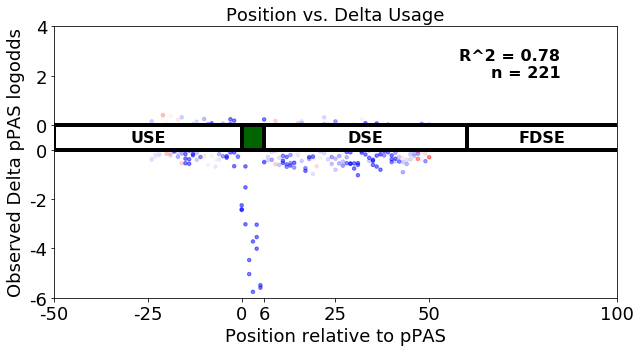

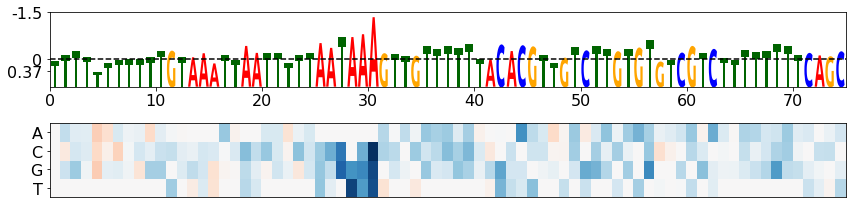

In [16]:
#Max Isoform SNV analysis

save_figs = False

seq_start = 25
seq_end = 100

p_val = 0.001

#All variants
#df_to_use = seq_predicted_isoform_df_delta_filtered_allexp.query("variant == 'snv' and experiment == 'max_iso'").copy()
df_to_use = variant_df.query("variant == 'snv' and experiment == 'max_iso'").copy().set_index('master_seq')


df_to_use['delta_logodds_true'] = df_to_use['median_proximal_vs_distal_logodds_var'] - df_to_use['median_proximal_vs_distal_logodds_ref']

df_to_use = df_to_use.query("n_barcodes_ref >= 5 and n_barcodes_var >= 5 and mean_total_count_ref >= 200 and mean_total_count_var >= 200")

whitelist_dict = {
    'simple_0',
    'doubledope_0',
    'doubledope_1'
}

for gene_i, gene in enumerate(df_to_use['gene'].unique()) :
    df_gene = df_to_use.query("gene == '" + gene + "'")
    for wt_seq_i, wt_seq in enumerate(sorted(df_gene['wt_seq'].unique())) :
        if gene + '_' + str(wt_seq_i) not in whitelist_dict :
            continue
        print("------------------------------------------------------")
        print("gene = " + gene + ', sequence ' + str(wt_seq_i) + '...')
        
        df_sel = df_gene.query("wt_seq == '" + wt_seq + "'")

        wt_logodds = df_sel['median_proximal_vs_distal_logodds_ref'].unique()[0]
        wt_usage = df_sel['median_proximal_vs_distal_usage_ref'].unique()[0]
        
        n_signi_up = len(df_sel.query("delta_p_val < " + str(p_val) + " and delta_logodds_true > 0"))
        n_signi_dn = len(df_sel.query("delta_p_val < " + str(p_val) + " and delta_logodds_true < 0"))
        
        print('WT Usage = ' + str(round(wt_usage, 4)) + " (" + str(round(wt_logodds, 4)) + ")")
        print('# Significant upreg. SNVs = ' + str(n_signi_up))
        print('# Significant downreg. SNVs = ' + str(n_signi_dn))
        
        figsize=(9, 5)

        fig_name = None
        if save_figs :
            fig_name = 'position_delta_max_iso_' + gene + '_' + str(wt_seq_i)
        plot_position_delta_scatter(df_sel, min_pred_filter=0.0, figsize=figsize, fig_name=fig_name, vmin=-0.5, vmax=0.5, fig_dpi=150, annotate=None)

        mut_map_v2(
            df_sel,
            gene,
            experiment='max_iso',
            mode='true',
            pred_column='mean_delta_logodds_pred',
            figsize=(12,3),
            mark_pathogenic=False,
            mark_benign=False,
            mark_undetermined=False,
            seq_trim_start=seq_start, seq_trim_end=seq_end,
            plot_start=0, plot_end=seq_end-seq_start,
            #pas_downscaling=0.5,
            pas_downscaling=-1.5,
            pas_downscale_mode='value',#'frac'
            fig_name=('max_iso_' + gene + '_' + str(wt_seq_i) + '_Mutmap_Observed') if save_figs else None,
            fig_dpi=300
        )
